## Считывание данных

In [1472]:
# иморитирование всех необходимых библиотек
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [1473]:
# Считываем тренировочные данные
train = pd.read_csv("train_oil.csv")

print(f"Train dataset shape: {train.shape}")

Train dataset shape: (309, 20)


In [1474]:
# Считываем тестовые данные
test = pd.read_csv("oil_test.csv")

print(f"Test dataset shape: {test.shape}")

Test dataset shape: (133, 19)


In [1475]:
# Посмотрим как выглядят данные
train.head()

,Field name,Reservoir unit,Country,Region,Basin name,Tectonic regime,Latitude,Longitude,Operator company,Onshore/Offshore,Hydrocarbon type,Reservoir status,Structural setting,Depth,Reservoir period,Lithology,Thickness (gross average ft),Thickness (net pay average ft),Porosity,Permeability
0,ZHIRNOV,MELEKESKIAN,RUSSIA,FORMER SOVIET UNION,VOLGA-URAL,COMPRESSION/EVAPORITE,51.0000,44.8042,NIZHNEVOLZHSKNET,ONSHORE,OIL,DECLINING PRODUCTION,FORELAND,1870,CARBONIFEROUS,SANDSTONE,262.0,33.0,24.0,30.0
1,LAGOA PARDA,LAGOA PARDA (URUCUTUCA),BRAZIL,LATIN AMERICA,ESPIRITO SANTO,EXTENSION,-19.6017,-39.8332,PETROBRAS,ONSHORE,OIL,NEARLY DEPLETED,PASSIVE MARGIN,4843,PALEOGENE,SANDSTONE,2133.0,72.0,23.0,350.0
2,ABQAIQ,ARAB D,SAUDI ARABIA,MIDDLE EAST,THE GULF,COMPRESSION/EVAPORITE,26.0800,49.8100,SAUDI ARAMCO,ONSHORE,OIL,REJUVENATING,FORELAND,6050,JURASSIC,LIMESTONE,250.0,184.0,21.0,410.0
3,MURCHISON,BRENT,UK /NORWAY,EUROPE,NORTH SEA NORTHERN,EXTENSION,61.3833,1.7500,CNR,OFFSHORE,OIL,NEARLY DEPLETED,RIFT,8988,JURASSIC,SANDSTONE,425.0,300.0,22.0,750.0
4,WEST PEMBINA,NISKU (PEMBINA L POOL),CANADA,NORTH AMERICA,WESTERN CANADA,COMPRESSION,53.2287,-115.8008,NUMEROUS,ONSHORE,OIL,UNKNOWN,FORELAND,9306,DEVONIAN,DOLOMITE,233.0,167.0,11.8,1407.0


In [1476]:
test.head()

,Field name,Reservoir unit,Country,Region,Basin name,Tectonic regime,Latitude,Longitude,Operator company,Hydrocarbon type,Reservoir status,Structural setting,Depth,Reservoir period,Lithology,Thickness (gross average ft),Thickness (net pay average ft),Porosity,Permeability
0,ABU GHARADIG,BAHARIYA,EGYPT,AFRICA,ABU GHARADIG,EXTENSION,29.7422,28.4925,GUPCO,GAS-CONDENSATE,MATURE PRODUCTION,RIFT,10282,CRETACEOUS,SANDSTONE,745.0,144.0,10.0,8.0
1,ABU MADI-EL QARA,ABU MADI (LEVEL III),EGYPT,AFRICA,NILE DELTA,STRIKE-SLIP/TRANSTENSION/SHALE/EVAPORITE/BASEM...,31.4382,31.3616,IEOC,GAS,DECLINING PRODUCTION,WRENCH/DELTA,10499,NEOGENE,SANDSTONE,509.0,410.0,20.0,300.0
2,ALIBEKMOLA,KT I,KAZAKHSTAN,FORMER SOVIET UNION,CASPIAN NORTH,COMPRESSION/EVAPORITE,48.4740,57.6667,KAZAKHOIL AKTOBE,OIL,DEVELOPING,SUB-SALT/FORELAND,6000,CARBONIFEROUS,LIMESTONE,300.0,105.0,10.0,20.0
3,ALWYN NORTH,BRENT (BRENT EAST),UK,EUROPE,NORTH SEA NORTHERN,INVERSION/COMPRESSION/EXTENSION,60.7833,1.7333,TOTAL,OIL,NEARLY DEPLETED,RIFT,9790,JURASSIC,SANDSTONE,886.0,344.0,17.0,500.0
4,ANKLESHWAR,ANKLESHWAR (HAZAD-ARDOL),INDIA,FAR EAST,CAMBAY,STRIKE-SLIP/TRANSPRESSION/BASEMENT-I,21.6000,72.9167,ONGC,OIL,MATURE PRODUCTION,WRENCH/RIFT,2950,PALEOGENE,SANDSTONE,670.0,0.0,21.0,250.0


## Исследование и обработка данных

In [1477]:
train.dtypes

Field name                         object
Reservoir unit                     object
Country                            object
Region                             object
Basin name                         object
Tectonic regime                    object
Latitude                          float64
Longitude                         float64
Operator company                   object
Onshore/Offshore                   object
Hydrocarbon type                   object
Reservoir status                   object
Structural setting                 object
Depth                               int64
Reservoir period                   object
Lithology                          object
Thickness (gross average ft)      float64
Thickness (net pay average ft)    float64
Porosity                          float64
Permeability                      float64
dtype: object

In [1478]:
df = train.copy()

In [1479]:
cols_missing = ['Latitude', 'Longitude']
for i in cols_missing:
    train[i].fillna(train[i].mean(), inplace=True)

In [1480]:
cols_missing = ['Latitude', 'Longitude']
for i in cols_missing:
    test[i].fillna(test[i].mean(), inplace=True)
#test = test.dropna()

In [1481]:
train = train.fillna('Missing')

In [1482]:
test = test.fillna('Missing')

### BoxPlot

<AxesSubplot:>

<Figure size 1440x1440 with 0 Axes>

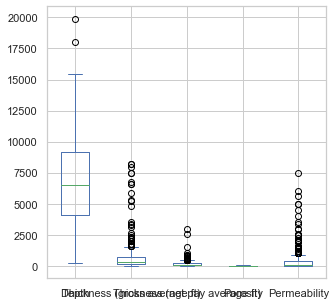

In [1483]:
plt.figure(figsize=(20,20))

train[['Depth', 'Thickness (gross average ft)', 'Thickness (net pay average ft)', 'Porosity', 'Permeability']].plot(kind='box')

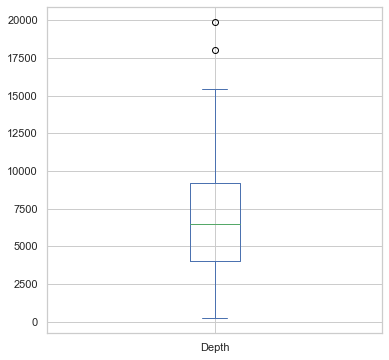

In [1484]:
_, bp = train.Depth.plot.box(return_type='both', figsize=(6,6))

In [1485]:
outliers = [flier.get_ydata() for flier in bp["fliers"]][0]
train[train.Depth.isin(outliers)]

,Field name,Reservoir unit,Country,Region,Basin name,Tectonic regime,Latitude,Longitude,Operator company,Onshore/Offshore,Hydrocarbon type,Reservoir status,Structural setting,Depth,Reservoir period,Lithology,Thickness (gross average ft),Thickness (net pay average ft),Porosity,Permeability
224,MILLS RANCH,HUNTON (CHIMNEY HILL-HENRYHOUSE),USA,NORTH AMERICA,ANADARKO,COMPRESSION/EROSION,35.3676,-100.0793,CHEVRON,ONSHORE,GAS,NEARLY DEPLETED,THRUST,19888,SILURIAN,DOLOMITE,930.0,94.0,6.0,7.0
272,HATTERS POND,NORPHLET,USA,NORTH AMERICA,GULF OF MEXICO NORTHERN ONSHORE,GRAVITY/EXTENSION/EVAPORITE/DIAPIR/SYNSEDIMENT...,30.8976,-88.0660,CHEVRON,ONSHORE,GAS-CONDENSATE,DECLINING PRODUCTION,SALT/PASSIVE MARGIN,18050,JURASSIC,SANDSTONE,350.0,200.0,10.4,0.5


In [1486]:
Q1 =  train.Depth.quantile(0.25)
Q3 = train.Depth.quantile(0.75)
IQR = Q3 - Q1

print(Q1)
print(IQR)
print(Q3)

train[(train.Depth < Q1-1.5*IQR ) | (train.Depth > Q3+1.5*IQR)]

4059.0
5127.0
9186.0


,Field name,Reservoir unit,Country,Region,Basin name,Tectonic regime,Latitude,Longitude,Operator company,Onshore/Offshore,Hydrocarbon type,Reservoir status,Structural setting,Depth,Reservoir period,Lithology,Thickness (gross average ft),Thickness (net pay average ft),Porosity,Permeability
224,MILLS RANCH,HUNTON (CHIMNEY HILL-HENRYHOUSE),USA,NORTH AMERICA,ANADARKO,COMPRESSION/EROSION,35.3676,-100.0793,CHEVRON,ONSHORE,GAS,NEARLY DEPLETED,THRUST,19888,SILURIAN,DOLOMITE,930.0,94.0,6.0,7.0
272,HATTERS POND,NORPHLET,USA,NORTH AMERICA,GULF OF MEXICO NORTHERN ONSHORE,GRAVITY/EXTENSION/EVAPORITE/DIAPIR/SYNSEDIMENT...,30.8976,-88.0660,CHEVRON,ONSHORE,GAS-CONDENSATE,DECLINING PRODUCTION,SALT/PASSIVE MARGIN,18050,JURASSIC,SANDSTONE,350.0,200.0,10.4,0.5


In [1487]:
train.drop([224, 272], inplace = True)

D:\all\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\all\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\all\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\all\anaconda\lib\site-packages\seaborn\_decorators.py:3

<AxesSubplot:xlabel='Porosity'>

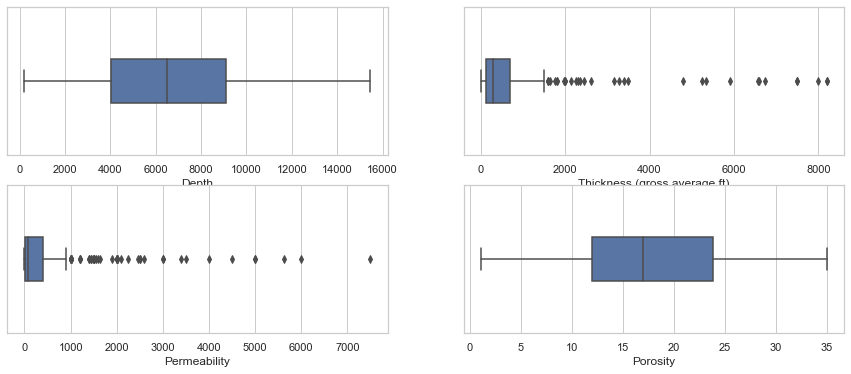

In [1488]:
fig, axes = plt.subplots(2, 2, figsize=(15,6))  

sns.boxplot(train['Depth'], ax=axes[0, 0], width=0.3)
sns.boxplot(train['Thickness (gross average ft)'], ax=axes[0, 1], width=0.3)
sns.boxplot(train['Permeability'], ax=axes[1,0], width=0.3)
sns.boxplot(train['Porosity'], ax=axes[1, 1], width=0.3)

In [1489]:
train.shape

(307, 20)

In [1490]:
df = train.drop(train[(train['Thickness (gross average ft)'] > 1900) | (train['Permeability'] > 1000)].index)

In [1491]:
train = df.copy()

### Распределение переменных

D:\all\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Depth', ylabel='Density'>

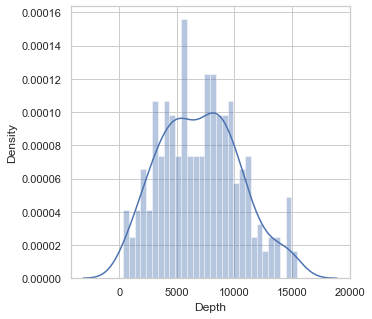

In [1492]:
plt.figure(figsize=(5,5))

sns.distplot(train['Depth'], bins=30)

D:\all\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\all\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\all\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms)

<AxesSubplot:xlabel='Porosity', ylabel='Density'>

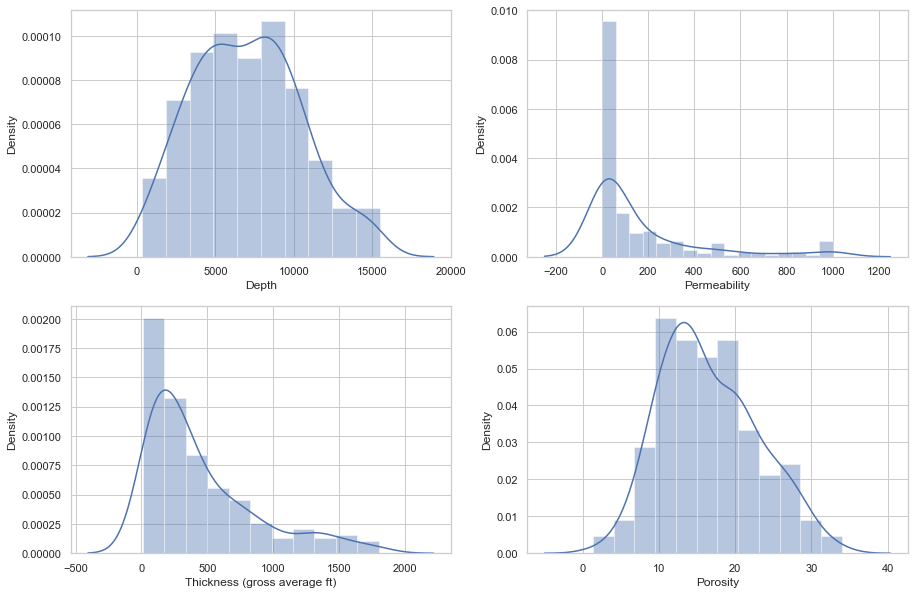

In [1493]:
fig, axes = plt.subplots(2, 2, figsize=(15,10))  

sns.distplot(train['Depth'], ax=axes[0, 0])
sns.distplot(train['Permeability'], ax=axes[0, 1])
sns.distplot(train['Thickness (gross average ft)'], ax=axes[1,0])
sns.distplot(train['Porosity'], ax=axes[1, 1])

### Взаимосвязи между переменными

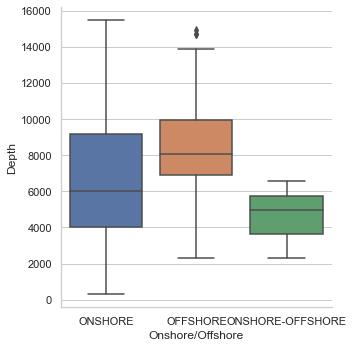

In [1494]:
sns.catplot(x="Onshore/Offshore", y="Depth", kind = "box", data=train)

Давайте взглянем на первый из таких сложных графиков, график попарных отношений , который по умолчанию создает матрицу точечных графиков. Такой график помогает нам визуализировать взаимосвязь между различными переменными в одном выводе.

In [1495]:
# tmp = train[['Depth', 'Thickness (gross average ft)', 'Thickness (net pay average ft)', 'Porosity', 'Permeability', 'Onshore/Offshore']]
# sns.pairplot(tmp, hue = 'Onshore/Offshore')

### Обработка категориальных признаков

In [1496]:
train.head()

,Field name,Reservoir unit,Country,Region,Basin name,Tectonic regime,Latitude,Longitude,Operator company,Onshore/Offshore,Hydrocarbon type,Reservoir status,Structural setting,Depth,Reservoir period,Lithology,Thickness (gross average ft),Thickness (net pay average ft),Porosity,Permeability
0,ZHIRNOV,MELEKESKIAN,RUSSIA,FORMER SOVIET UNION,VOLGA-URAL,COMPRESSION/EVAPORITE,51.0000,44.8042,NIZHNEVOLZHSKNET,ONSHORE,OIL,DECLINING PRODUCTION,FORELAND,1870,CARBONIFEROUS,SANDSTONE,262.0,33.0,24.0,30.0
2,ABQAIQ,ARAB D,SAUDI ARABIA,MIDDLE EAST,THE GULF,COMPRESSION/EVAPORITE,26.0800,49.8100,SAUDI ARAMCO,ONSHORE,OIL,REJUVENATING,FORELAND,6050,JURASSIC,LIMESTONE,250.0,184.0,21.0,410.0
3,MURCHISON,BRENT,UK /NORWAY,EUROPE,NORTH SEA NORTHERN,EXTENSION,61.3833,1.7500,CNR,OFFSHORE,OIL,NEARLY DEPLETED,RIFT,8988,JURASSIC,SANDSTONE,425.0,300.0,22.0,750.0
5,UCHKYR,XV-1,UZBEKISTAN,FORMER SOVIET UNION,AMU DARYA,INVERSION/COMPRESSION/EXTENSION/EVAPORITE,40.1494,62.9906,SREDAZGAZPROM,ONSHORE,GAS,DECLINING PRODUCTION,INVERSION/RIFT,5443,JURASSIC,DOLOMITE,82.0,59.0,16.0,61.0
6,WESTHOPE SOUTH,CHARLES,USA,NORTH AMERICA,WILLISTON,COMPRESSION,48.8521,-101.0130,AMERADA HESS,ONSHORE,OIL,MATURE PRODUCTION,INTRACRATONIC,3275,CARBONIFEROUS,DOLOMITIC LIMESTONE,43.0,15.5,10.0,2.6


In [1497]:
train['Tectonic regime'].value_counts()

COMPRESSION                                                 65
COMPRESSION/EROSION                                         23
EXTENSION                                                   21
COMPRESSION/EVAPORITE                                       19
INVERSION/COMPRESSION/EXTENSION                             17
EXTENSION/EROSION                                            8
GRAVITY/EXTENSION/EVAPORITE                                  7
GRAVITY/EXTENSION/EVAPORITE/SYNSEDIMENTATION                 7
INVERSION/COMPRESSION/EXTENSION/EVAPORITE                    5
GRAVITY/EVAPORITE/COMPRESSION                                5
COMPRESSION/EXTENSION/LINKED                                 5
INVERSION/COMPRESSION/EXTENSION/EVAPORITE/GRAVITY            5
GRAVITY/EVAPORITE/EXTENSION                                  4
COMPRESSION/EROSION/EXTENSION/LINKED                         3
COMPRESSION/EVAPORITE/EXTENSION/LINKED                       3
EXTENSION/EVAPORITE/EROSION/GRAVITY                    

In [1498]:
train.drop(columns = 'Basin name', inplace = True)
mult_name = ['Tectonic regime', 'Structural setting']
di = {'Tectonic regime' : [], 'Structural setting' : []}
df = train.copy()
for col in mult_name:
    for s in df[col]:
        new_str = s.split('/')
        di[col].extend(new_str)
    arr = np.array(di[col])
    values, counts = np.unique(arr, return_counts = True)
    list_to_del = []
    for i in range(len(counts) - 1, -1, -1):
        if counts[i] < 5:
            list_to_del.append(i)
    #
    values = list(values)
    for i in list_to_del:
        del values[i]
    #col_names = list(map(lambda x: col[:4] + '_' + x, values + ['OTHERS']))
    for val in values:
        df[col[:4] + '_' + val] = df[col].apply(lambda x : x.split('/').count(val))
        test[col[:4] + '_' + val] = 0
df.drop(mult_name, axis = 1, inplace = True)
train = df.copy()
train.shape


(242, 41)

In [1499]:
test.drop(columns = 'Basin name', inplace = True)
mult_name = ['Tectonic regime', 'Structural setting']
di = {'Tectonic regime' : [], 'Structural setting' : []}
df = test.copy()
for col in mult_name:
    for s in df[col]:
        new_str = s.split('/')
        di[col].extend(new_str)
    arr = np.array(di[col])
    values, counts = np.unique(arr, return_counts = True)
    list_to_del = []
    for i in range(len(counts) - 1, -1, -1):
        if counts[i] < 5:
            list_to_del.append(i)
    #
    values = list(values)
    for i in list_to_del:
        del values[i]
    #col_names = list(map(lambda x: col[:4] + '_' + x, values + ['OTHERS']))
    for val in values:
        df[col[:4] + '_' + val] = df[col].apply(lambda x : x.split('/').count(val))
df.drop(mult_name, axis = 1, inplace = True)
test = df.copy()
test.shape

(133, 41)

In [1500]:
train['Hydrocarbon type'].value_counts()

OIL               177
GAS                39
GAS-CONDENSATE     25
CARBON DIOXIDE      1
Name: Hydrocarbon type, dtype: int64

In [1501]:
train = train[train['Hydrocarbon type'] != 'CARBON DIOXIDE']
test = test[test['Hydrocarbon type'] != 'CARBON DIOXIDE']

In [1502]:
train['Field name'].value_counts()

ERSKINE              3
ZAKUM                3
LAOJUNMIAO           3
MISKAR               2
CHATEAURENARD        2
                    ..
BIBI HAKIMEH         1
MITSUE               1
GASIKULE             1
NORTH SABINE LAKE    1
WELL DRAW            1
Name: Field name, Length: 223, dtype: int64

In [1503]:
train.drop(columns = ['Field name'], inplace = True)
test.drop(columns = ['Field name'], inplace = True)

In [1504]:
train['Reservoir unit'].value_counts()

SAN ANDRES                 7
BRENT                      6
SHUAIBA                    5
TOR-EKOFISK                4
LEMAN SANDSTONE            4
                          ..
CLEARFORK-GLORIETA         1
MISSION CANYON             1
DAKOTA SANDSTONE           1
ASMARI                     1
MESAVERDE (TEAPOT SAND)    1
Name: Reservoir unit, Length: 204, dtype: int64

In [1505]:
train.drop(columns = ['Reservoir unit'], inplace = True)
test.drop(columns = ['Reservoir unit'], inplace = True)

In [1506]:
train['Country'].value_counts()

USA                 69
CANADA              26
Missing             21
UK                  20
RUSSIA              16
CHINA               15
EGYPT                7
NORWAY               7
OMAN                 6
FRANCE               5
VENEZUELA            4
AUSTRALIA            4
INDONESIA            4
UAE                  4
QATAR                3
BRAZIL               3
SAUDI ARABIA         2
TUNISIA              2
TURKMENISTAN         2
INDIA                2
PAPUA NEW GUINEA     2
AFGHANISTAN          1
SOUTH AFRICA         1
TUNISIA /ALGERIA     1
IRAQ                 1
DENMARK              1
ALGERIA              1
ANGOLA               1
NEUTRAL ZONE         1
IRAN                 1
THAILAND             1
LIBYA                1
TURKEY               1
KAZAKHSTAN           1
COLOMBIA             1
UZBEKISTAN           1
UK /NORWAY           1
MALAYSIA             1
Name: Country, dtype: int64

In [1507]:
def f(x):
    if (any(train['Country'] == x)) and (train['Country'].value_counts()[x] >= 14):
        return(x)
    else:  
        return('OTHER')

In [1508]:
train['Country'] = train['Country'].apply(f)
test['Country'] = test['Country'].apply(f)

D:\all\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\all\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Nikita\AppData\Local\Temp/ipykernel_9036/1311538264.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


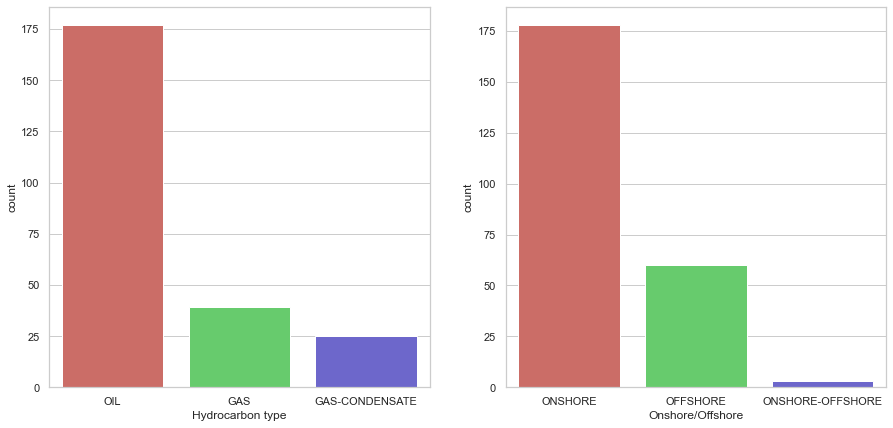

In [1509]:
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

fig, ax = plt.subplots(1,2, figsize=(15, 7))

sns.countplot(train['Hydrocarbon type'], ax=ax[0], palette='hls')
sns.countplot(train['Onshore/Offshore'], ax=ax[1], palette='hls')
fig.show()

Баланс?

In [1510]:
train['Onshore/Offshore'].value_counts()

ONSHORE             178
OFFSHORE             60
ONSHORE-OFFSHORE      3
Name: Onshore/Offshore, dtype: int64

In [1511]:
categ = ['Hydrocarbon type', 'Reservoir status', 'Reservoir period', 'Lithology', 'Region']

In [1512]:
for i in categ:
    s = test[i].value_counts().index[0]
    vals = set(test[i].unique()).difference(set(train[i].unique()))
    test[i] = test[i].replace(vals, s)

In [1513]:
from sklearn import preprocessing
# Encode Categorical Columns
le = preprocessing.LabelEncoder()
train['Onshore/Offshore'] = le.fit_transform(train['Onshore/Offshore'])

In [1514]:
mapping = dict(zip(range(len(le.classes_)), le.classes_))
mapping

{0: 'OFFSHORE', 1: 'ONSHORE', 2: 'ONSHORE-OFFSHORE'}

In [1515]:
from sklearn import preprocessing
# Encode Categorical Columns
le = preprocessing.LabelEncoder()
train['Region'] = le.fit_transform(train['Region'])
test['Region'] = le.transform(test['Region'])

In [1516]:
from sklearn import preprocessing
# Encode Categorical Columns
le = preprocessing.LabelEncoder()
train['Reservoir status'] = le.fit_transform(train['Reservoir status'])
test['Reservoir status'] = le.transform(test['Reservoir status'])
train.head()

,Country,Region,Latitude,Longitude,Operator company,Onshore/Offshore,Hydrocarbon type,Reservoir status,Depth,Reservoir period,Lithology,Thickness (gross average ft),Thickness (net pay average ft),Porosity,Permeability,Tect_BASEMENT-I,Tect_COMPRESSION,Tect_EROSION,Tect_EVAPORITE,Tect_EXTENSION,Tect_GRAVITY,Tect_INVERSION,Tect_LINKED,Tect_SHALE,Tect_STRIKE-SLIP,Tect_SYNSEDIMENTATION,Tect_TRANSPRESSION,Tect_TRANSTENSION,Stru_DELTA,Stru_FORELAND,Stru_INTRACRATONIC,Stru_INVERSION,Stru_PASSIVE MARGIN,Stru_RIFT,Stru_SALT,Stru_SUB-SALT,Stru_SUB-THRUST,Stru_THRUST,Stru_WRENCH
0,RUSSIA,3,51.0000,44.8042,NIZHNEVOLZHSKNET,1,OIL,2,1870,CARBONIFEROUS,SANDSTONE,262.0,33.0,24.0,30.0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,OTHER,5,26.0800,49.8100,SAUDI ARAMCO,1,OIL,8,6050,JURASSIC,LIMESTONE,250.0,184.0,21.0,410.0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,OTHER,1,61.3833,1.7500,CNR,0,OIL,6,8988,JURASSIC,SANDSTONE,425.0,300.0,22.0,750.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
5,OTHER,3,40.1494,62.9906,SREDAZGAZPROM,1,GAS,2,5443,JURASSIC,DOLOMITE,82.0,59.0,16.0,61.0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
6,USA,7,48.8521,-101.0130,AMERADA HESS,1,OIL,5,3275,CARBONIFEROUS,DOLOMITIC LIMESTONE,43.0,15.5,10.0,2.6,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [1517]:
train = pd.get_dummies(train, columns=['Hydrocarbon type', 'Reservoir period', 'Lithology', 'Country'], drop_first = True)

In [1518]:
test =  pd.get_dummies(test, columns=['Hydrocarbon type', 'Reservoir period', 'Lithology', 'Country'], drop_first = True)

In [1519]:
train.shape

(241, 73)

In [1520]:
crr = train.corr()

In [1521]:
train.columns

Index(['Region', 'Latitude', 'Longitude', 'Operator company',
       'Onshore/Offshore', 'Reservoir status', 'Depth',
       'Thickness (gross average ft)', 'Thickness (net pay average ft)',
       'Porosity', 'Permeability', 'Tect_BASEMENT-I', 'Tect_COMPRESSION',
       'Tect_EROSION', 'Tect_EVAPORITE', 'Tect_EXTENSION', 'Tect_GRAVITY',
       'Tect_INVERSION', 'Tect_LINKED', 'Tect_SHALE', 'Tect_STRIKE-SLIP',
       'Tect_SYNSEDIMENTATION', 'Tect_TRANSPRESSION', 'Tect_TRANSTENSION',
       'Stru_DELTA', 'Stru_FORELAND', 'Stru_INTRACRATONIC', 'Stru_INVERSION',
       'Stru_PASSIVE MARGIN', 'Stru_RIFT', 'Stru_SALT', 'Stru_SUB-SALT',
       'Stru_SUB-THRUST', 'Stru_THRUST', 'Stru_WRENCH',
       'Hydrocarbon type_GAS-CONDENSATE', 'Hydrocarbon type_OIL',
       'Reservoir period_CAMBRIAN-ORDOVICIAN',
       'Reservoir period_CARBONIFEROUS',
       'Reservoir period_CARBONIFEROUS-PERMIAN', 'Reservoir period_CRETACEOUS',
       'Reservoir period_CRETACEOUS-PALEOGENE', 'Reservoir period_DEVO

In [1522]:
train.drop(columns = 'Operator company', inplace =True)
test.drop(columns = 'Operator company', inplace =True)

In [1523]:
train.head()

,Region,Latitude,Longitude,Onshore/Offshore,Reservoir status,Depth,Thickness (gross average ft),Thickness (net pay average ft),Porosity,Permeability,Tect_BASEMENT-I,Tect_COMPRESSION,Tect_EROSION,Tect_EVAPORITE,Tect_EXTENSION,Tect_GRAVITY,Tect_INVERSION,Tect_LINKED,Tect_SHALE,Tect_STRIKE-SLIP,Tect_SYNSEDIMENTATION,Tect_TRANSPRESSION,Tect_TRANSTENSION,Stru_DELTA,Stru_FORELAND,Stru_INTRACRATONIC,Stru_INVERSION,Stru_PASSIVE MARGIN,Stru_RIFT,Stru_SALT,Stru_SUB-SALT,Stru_SUB-THRUST,Stru_THRUST,Stru_WRENCH,Hydrocarbon type_GAS-CONDENSATE,Hydrocarbon type_OIL,Reservoir period_CAMBRIAN-ORDOVICIAN,Reservoir period_CARBONIFEROUS,Reservoir period_CARBONIFEROUS-PERMIAN,Reservoir period_CRETACEOUS,Reservoir period_CRETACEOUS-PALEOGENE,Reservoir period_DEVONIAN,Reservoir period_JURASSIC,Reservoir period_JURASSIC-CRETACEOUS,Reservoir period_MESOZOIC,Reservoir period_NEOGENE,Reservoir period_ORDOVICIAN,Reservoir period_PALEOGENE,Reservoir period_PALEOGENE-NEOGENE,Reservoir period_PALEOZOIC,Reservoir period_PERMIAN,Reservoir period_PROTEROZOIC,Reservoir period_TRIASSIC,Reservoir period_TRIASSIC-JURASSIC,Lithology_CHALKY LIMESTONE,Lithology_CONGLOMERATE,Lithology_DOLOMITE,Lithology_DOLOMITIC LIMESTONE,Lithology_LIMESTONE,Lithology_LOW-RESISTIVITY SANDSTONE,Lithology_SANDSTONE,Lithology_SHALE,Lithology_SHALY SANDSTONE,Lithology_SILTSTONE,Lithology_THINLY-BEDDED SANDSTONE,Lithology_VOLCANICS,Country_CHINA,Country_Missing,Country_OTHER,Country_RUSSIA,Country_UK,Country_USA
0,3,51.0000,44.8042,1,2,1870,262.0,33.0,24.0,30.0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2,5,26.0800,49.8100,1,8,6050,250.0,184.0,21.0,410.0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
3,1,61.3833,1.7500,0,6,8988,425.0,300.0,22.0,750.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
5,3,40.1494,62.9906,1,2,5443,82.0,59.0,16.0,61.0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
6,7,48.8521,-101.0130,1,5,3275,43.0,15.5,10.0,2.6,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [1524]:
pd.set_option('display.max_columns', None)
train.dtypes

Region                int32
Latitude            float64
Longitude           float64
Onshore/Offshore      int32
Reservoir status      int32
                     ...   
Country_Missing       uint8
Country_OTHER         uint8
Country_RUSSIA        uint8
Country_UK            uint8
Country_USA           uint8
Length: 72, dtype: object

In [1525]:
train = train.astype('float')

In [1526]:
train = train[train['Onshore/Offshore'] != 2]

In [1527]:
train['Onshore/Offshore'].unique()

array([1., 0.])

## Обучение модели

In [1528]:
X = train.drop(columns=['Onshore/Offshore'])
y = train['Onshore/Offshore']

In [1529]:
np.arange(7, 55, 5)

array([ 7, 12, 17, 22, 27, 32, 37, 42, 47, 52])

In [1530]:
%%time

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rfc = RandomForestClassifier(n_jobs = -1)
param_grid = { 
    'n_estimators': [7, 14, 17, 45], #np.arange(7, 20, 5),
    'max_depth': [7, 11, 15, 33], #np.arange(3, 31, 7),
    'min_samples_split' : [0.1, 2, 3, 4, 6],
    'min_samples_leaf' : [0.1, 2, 3, 4],
}

CV = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5, n_jobs = -1)

CV.fit(X, y)

Wall time: 8.03 s


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1), n_jobs=-1,
             param_grid={'max_depth': [7, 11, 15, 33],
                         'min_samples_leaf': [0.1, 2, 3, 4],
                         'min_samples_split': [0.1, 2, 3, 4, 6],
                         'n_estimators': [7, 14, 17, 45]})

In [1531]:
est = CV.best_estimator_
est

RandomForestClassifier(max_depth=7, min_samples_leaf=3, min_samples_split=6,
                       n_estimators=17, n_jobs=-1)

In [1532]:
CV.best_score_

0.9034574468085106

# {'OFFSHORE': 0, 'ONSHORE': 1, 'ONSHORE-OFFSHORE': 2}

In [1533]:
test = test.reindex(columns = X.columns, fill_value=0)

In [1534]:
y_pred_test = est.predict(test)

In [1538]:
y_pred_test = pd.DataFrame(np.array([mapping[int(x)] for x in y_pred_test]), columns=['Onshore/Offshore'])
y_pred_test = y_pred_test.reset_index()
y_pred_test.to_csv("submission.csv", index=False)